In [46]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [47]:
from requests import get
url = 'https://www.goodreads.com/list/show/12362.All_Time_Favorite_Romance_Novels?page=1'
response = requests.get(url)
html = response.content
html_soup = BeautifulSoup(html, "html.parser")
book_containers = html_soup.find_all('tr',itemtype="http://schema.org/Book")
print(type(book_containers))
print(len(book_containers))

<class 'bs4.element.ResultSet'>
100


In [48]:
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [49]:
first_book = book_containers[0]
first_book

<tr itemscope="" itemtype="http://schema.org/Book">
<td class="number" valign="top">1</td>
<td valign="top" width="5%">
<div class="u-anchorTarget" id="1885"></div>
<div class="js-tooltipTrigger tooltipTrigger" data-resource-id="1885" data-resource-type="Book">
<a href="/book/show/1885.Pride_and_Prejudice" title="Pride and Prejudice">
<img alt="Pride and Prejudice" class="bookCover" itemprop="image" src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1320399351i/1885._SY75_.jpg"/>
</a> </div>
</td>
<td valign="top" width="100%">
<a class="bookTitle" href="/book/show/1885.Pride_and_Prejudice" itemprop="url">
<span aria-level="4" itemprop="name" role="heading">Pride and Prejudice</span>
</a> <br/>
<span class="by">by</span>
<span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
<div class="authorName__container">
<a class="authorName" href="https://www.goodreads.com/author/show/1265.Jane_Austen" itemprop="url"><span itemprop="name">Jane Austen</s

In [50]:
book_containers = html_soup.find_all('div', class_ ="elementList")
print(type(book_containers))
print(len(book_containers))

<class 'bs4.element.ResultSet'>
0


In [51]:
name = first_book.find('a',class_="bookTitle").text.strip()
authors = first_book.find('a',class_="authorName").text.strip()

scoring = first_book.find('span',class_="greyText smallText uitext").text.strip().split()
avg_scores=scoring[0]
rates = scoring[4]

voted= first_book.find('span',class_="smallText uitext").text.strip().split()
scores=voted[1]
vote=voted[3]




In [52]:
print("name:",name)
print("authors:",authors)
print("scoring:",scoring)
print("averae sores:",avg_scores)
print("ratings", rates)
print("scores:",scores)

print("votes:",vote)

name: Pride and Prejudice
authors: Jane Austen
scoring: ['4.28', 'avg', 'rating', '—', '3,888,662', 'ratings']
averae sores: 4.28
ratings 3,888,662
scores: 237,502,
votes: 2,403


In [53]:
page = 1
names = []
ratings = []
avgscores = []
author=[]
score=[]
votes=[]
while page != 51:
    url = f"https://www.goodreads.com/list/show/12362.All_Time_Favorite_Romance_Novels?page={page}"
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, "html.parser")
    book_containers = soup.find_all('tr', itemtype="http://schema.org/Book")
    for container in book_containers:
        if container.find('td', width= '100%') is not None:
            name = container.find('a',class_="bookTitle").text.strip()
            names.append(name)
            authors = container.find('a',class_="authorName").text.strip()
            author.append(authors)
            scoring = container.find('span',class_="greyText smallText uitext").text.strip().split()
            ascores=scoring[0]
            avgscores.append(ascores)
            rates = scoring[4]
            ratings.append(rates)
            voted= container.find('span',class_="smallText uitext").text.strip().split()        
            scores=voted[1]
            score.append(scores)
            vote=voted[3]
            votes.append(vote)
    page = page + 1

SSLError: HTTPSConnectionPool(host='www.goodreads.com', port=443): Max retries exceeded with url: /list/show/12362.All_Time_Favorite_Romance_Novels?page=12 (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:997)')))

In [ ]:
names

['Pride and Prejudice',
 'Fifty Shades of Grey (Fifty Shades, #1)',
 'Beautiful Disaster (Beautiful, #1)',
 'Twilight (The Twilight Saga, #1)',
 'The Notebook (The Notebook, #1)',
 'Perfect Chemistry (Perfect Chemistry, #1)',
 'Outlander (Outlander, #1)',
 'Jane Eyre',
 'Thoughtless (Thoughtless, #1)',
 'Bared to You (Crossfire, #1)',
 'Easy (Contours of the Heart, #1)',
 'Gone with the Wind',
 "Gabriel's Inferno (Gabriel's Inferno, #1)",
 "The Time Traveler's Wife",
 'Slammed (Slammed, #1)',
 'Anna and the French Kiss (Anna and the French Kiss, #1)',
 'Vampire Academy (Vampire Academy, #1)',
 'A Walk to Remember',
 'Dark Lover (Black Dagger Brotherhood, #1)',
 'Wuthering Heights',
 'Hush, Hush (Hush, Hush, #1)',
 'The Fault in Our Stars',
 'Sense and Sensibility',
 'Persuasion',
 'The Host (The Host, #1)',
 'Divergent (Divergent, #1)',
 'City of Bones (The Mortal Instruments, #1)',
 'Obsidian (Lux, #1)',
 'Love Unscripted (Love, #1)',
 'On the Island (On the Island, #1)',
 'Hopeless (

## Reading data

In [ ]:
import pandas as pd
df = pd.DataFrame({'book title': names,
'ratings': ratings,
'avg_score': avgscores,
'author': author,
'score' : score,
'votes': votes
})
data=df
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  4999 non-null   object
 1   ratings     4999 non-null   object
 2   avg_score   4999 non-null   object
 3   author      4999 non-null   object
 4   score       4999 non-null   object
 5   votes       4999 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB
None


In [ ]:
data.head(-1)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,"3,888,637",4.28,Jane Austen,"237,502,","2,403"
1,"Fifty Shades of Grey (Fifty Shades, #1)","2,407,802",3.66,E.L. James,"231,134,","2,344"
2,"Beautiful Disaster (Beautiful, #1)","642,665",4.04,Jamie McGuire,"216,871,","2,200"
3,"Twilight (The Twilight Saga, #1)","6,096,358",3.64,Stephenie Meyer,"138,962,","1,426"
4,"The Notebook (The Notebook, #1)","1,582,163",4.14,Nicholas Sparks,"98,597,","1,013"
...,...,...,...,...,...,...
4993,The Endearment,"4,270",4.04,LaVyrle Spencer,"20,",1
4994,Ein Hauch von Skandal,"14,426",4.06,Sandra Brown,"20,",1
4995,Nothing Personal,"4,209",3.63,Jaci Burton,"19,",1
4996,"Heiress in Love (Ministry of Marriage, #1)",898,3.71,Christina Brooke,"19,",1


In [ ]:
import os  
os.makedirs('D:\webscrap\Goodreads', exist_ok=True)  
data.to_csv('D:\webscrap\Goodreads\Romantic.csv') 

In [ ]:
data.columns

Index(['book title', 'ratings', 'avg_score', 'author', 'score', 'votes'], dtype='object')

###  Data cleaing and handling

In [ ]:
data.describe()

,book title,ratings,avg_score,author,score,votes
count,4999,4999,4999,4999,4999,4999
unique,4983,3743,195,2457,1141,182
top,A French Affair,avg,really,Nora Roberts,"100,",1
freq,2,169,110,70,479,2851


In [ ]:
data.sort_values(by=['votes','ratings'], ascending=False).head(10)

,book title,ratings,avg_score,author,score,votes
124,"Lady Be Good (Wynette, Texas, #2)","17,447",3.99,Susan Elizabeth Phillips,"6,460,",98
109,"Pleasure Unbound (Demonica, #1)","53,014",4.04,Larissa Ione,"8,392,",97
103,Heart on a Chain,"17,169",4.03,Cindy C. Bennett,"8,907,",97
125,"Dream a Little Dream (Chicago Stars, #4)","33,706",4.17,Susan Elizabeth Phillips,"6,390,",95
113,"Something Wonderful (Sequels, #2)","28,777",4.31,Judith McNaught,"7,709,",95
6,"Outlander (Outlander, #1)","981,004",4.25,Diana Gabaldon,"91,404,",932
122,"Vain (The Seven Deadly, #1)","30,324",4.22,Fisher Amelie,"6,666,",91
118,"Rules of Protection (Tangled in Texas, #1)","7,476",3.84,Alison Bliss,"7,406,",90
111,"Cross My Heart (Cross My Heart, #1)","18,662",3.91,Katie Klein,"8,091,",90
814,Sweet Revenge,avg,really,Nora Roberts,"530,",9


In [ ]:
string_val_row=data[data['ratings'] == 'avg']

string_val_row

,book title,ratings,avg_score,author,score,votes
44,"Leaving Paradise (Leaving Paradise, #1)",avg,really,Simone Elkeles,"20,519,",222
72,"Wallbanger (Cocktail, #1)",avg,really,Alice Clayton,"13,646,",161
98,Lock and Key,avg,really,Sarah Dessen,"9,825,",112
115,"Backstage Pass (Sinners on Tour, #1)",avg,really,Olivia Cunning,"7,579,",89
258,The V Girl: a Coming of Age Story,avg,really,Mya Robarts,"2,690,",33
...,...,...,...,...,...,...
4858,"Edge of Passion (Stealth Guardians, #1)",avg,really,Tina Folsom,"30,",1
4877,"Stranger in the Moonlight (Edilean, #7)",avg,really,Jude Deveraux,"29,",1
4907,"Knight Triumphant (Graham, #4)",avg,really,Shannon Drake,"27,",1
4952,"Honggane (Honggane, #1)",avg,really,Mi-Ri Hwang,"23,",1


In [ ]:
data.drop(data[data['ratings'] == 'avg'].index, inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  4830 non-null   object
 1   ratings     4830 non-null   object
 2   avg_score   4830 non-null   object
 3   author      4830 non-null   object
 4   score       4830 non-null   object
 5   votes       4830 non-null   object
dtypes: object(6)
memory usage: 264.1+ KB


In [ ]:
data.head(-1)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,"3,888,637",4.28,Jane Austen,"237,502,","2,403"
1,"Fifty Shades of Grey (Fifty Shades, #1)","2,407,802",3.66,E.L. James,"231,134,","2,344"
2,"Beautiful Disaster (Beautiful, #1)","642,665",4.04,Jamie McGuire,"216,871,","2,200"
3,"Twilight (The Twilight Saga, #1)","6,096,358",3.64,Stephenie Meyer,"138,962,","1,426"
4,"The Notebook (The Notebook, #1)","1,582,163",4.14,Nicholas Sparks,"98,597,","1,013"
...,...,...,...,...,...,...
4993,The Endearment,"4,270",4.04,LaVyrle Spencer,"20,",1
4994,Ein Hauch von Skandal,"14,426",4.06,Sandra Brown,"20,",1
4995,Nothing Personal,"4,209",3.63,Jaci Burton,"19,",1
4996,"Heiress in Love (Ministry of Marriage, #1)",898,3.71,Christina Brooke,"19,",1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  4830 non-null   object
 1   ratings     4830 non-null   object
 2   avg_score   4830 non-null   object
 3   author      4830 non-null   object
 4   score       4830 non-null   object
 5   votes       4830 non-null   object
dtypes: object(6)
memory usage: 264.1+ KB


In [ ]:
# Convert the 'ratings' column to a numeric data type
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data['ratings'].fillna(int(data['ratings'].mean()), inplace=True)
print(data['ratings'].describe())


count    4830.000000
mean      257.218634
std       153.320127
min         0.000000
25%       257.000000
50%       257.000000
75%       257.000000
max       999.000000
Name: ratings, dtype: float64


In [ ]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['ratings'])
plt.show()

print(data['ratings'])

KeyError: 0

<Figure size 360x720 with 0 Axes>

In [ ]:
outliers_votes=data[data['ratings'] >=300 ].count()
outliers_votes

book title    493
ratings       493
avg_score     493
author        493
score         493
votes         493
dtype: int64

In [ ]:
data.drop(data[data['ratings'] >=300 ].index, inplace=True)

In [ ]:
# Convert the 'avg_score' column to a numeric data type
data['avg_score'] = pd.to_numeric(data['avg_score'], errors='coerce')
print(data['avg_score'].describe())

count    4330.000000
mean        4.012400
std         0.311113
min         0.000000
25%         3.850000
50%         4.020000
75%         4.190000
max         4.970000
Name: avg_score, dtype: float64


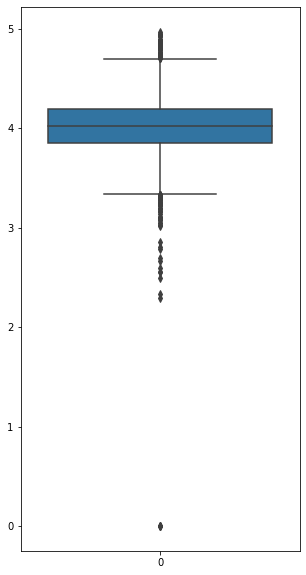

0       4.28
1       3.66
2       4.04
3       3.64
4       4.14
        ... 
4993    4.04
4994    4.06
4995    3.63
4997    3.73
4998    3.67
Name: avg_score, Length: 4337, dtype: float64


In [ ]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['avg_score'])
plt.show()

print(data['avg_score'])

In [ ]:
outliers_avg=data[data['avg_score'] <=2.9 ].count()
outliers_avg

book title    16
ratings       16
avg_score     16
author        16
score         16
votes         16
dtype: int64

In [ ]:
data.drop(data[data['avg_score'] <=2.9 ].index, inplace=True)

1817    3.65
1818    3.71
1820    3.93
1821    3.97
1822    3.88
        ... 
4993    4.04
4994    4.06
4995    3.63
4997    3.73
4998    3.67
Name: avg_score, Length: 2630, dtype: float64
count    2623.000000
mean        4.007488
std         0.296487
min         3.020000
25%         3.820000
50%         3.990000
75%         4.190000
max         4.950000
Name: avg_score, dtype: float64


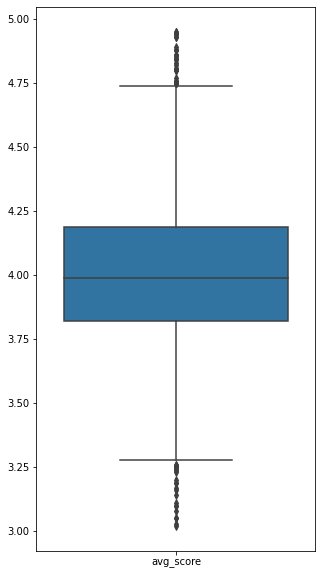

In [68]:
avg_score=pd.DataFrame(data, columns=['avg_score'])
print(data['avg_score'])
print(data['avg_score'].describe())
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=avg_score)
plt.show()



In [ ]:
# Convert the 'votes' column to a numeric data type
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')
data['votes'].fillna(int(data['votes'].mean()), inplace=True)

print(data['votes'].describe())

count    4321.000000
mean       11.643370
std        51.776759
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       932.000000
Name: votes, dtype: float64


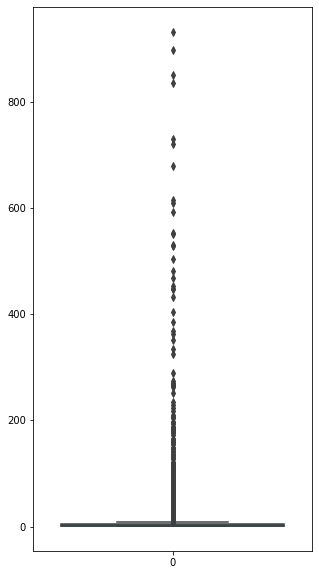

0       11.0
1       11.0
2       11.0
3       11.0
4       11.0
        ... 
4993     1.0
4994     1.0
4995     1.0
4997     1.0
4998     2.0
Name: votes, Length: 4321, dtype: float64


In [ ]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['votes'])
plt.show()

print(data['votes'])

In [ ]:
outliers_votes=data[data['votes'] >4 ].count()
outliers_votes

book title    1056
ratings       1056
avg_score     1056
author        1056
score         1056
votes         1056
dtype: int64

In [ ]:
data.drop(data[data['votes'] >4].index, inplace=True)

1817    2.0
1818    3.0
1820    2.0
1821    2.0
1822    2.0
       ... 
4993    1.0
4994    1.0
4995    1.0
4997    1.0
4998    2.0
Name: votes, Length: 2630, dtype: float64
count    2630.000000
mean        1.132700
std         0.386481
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: votes, dtype: float64


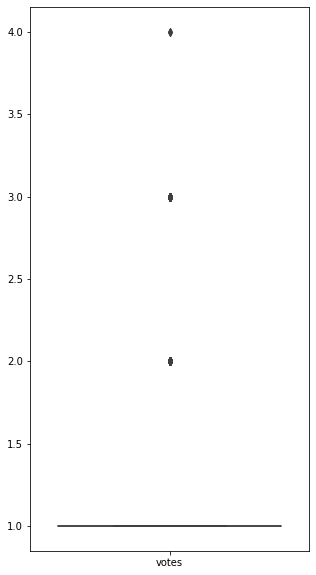

In [66]:
votes=pd.DataFrame(data, columns=['votes'])
print(data['votes'])
print(data['votes'].describe())
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=votes)
plt.show()



In [ ]:
data["score"] = df["score"].str.split(',').str[0].astype(float)

In [ ]:
# Define a lambda function to convert each value to numeric, or return the original value if conversion fails
to_numeric_or_original = lambda x: pd.to_numeric(x, errors='coerce') if isinstance(x, str) else x

# Apply the lambda function to each value in the 'score' column
data['score'] = data['score'].apply(to_numeric_or_original)

# Get summary statistics for the 'score' column
print(data['score'].describe())


count    3265.000000
mean      111.685145
std        67.366658
min        19.000000
25%        77.000000
50%        96.000000
75%       102.000000
max       400.000000
Name: score, dtype: float64


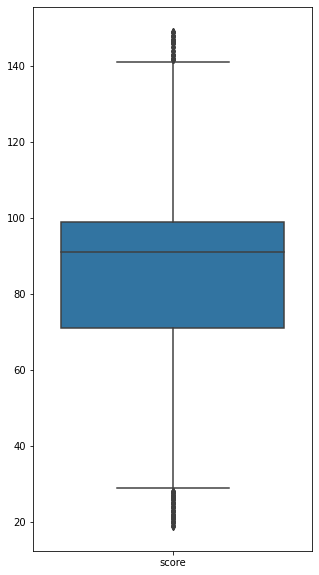

1817    149.0
1818    149.0
1820    149.0
1821    149.0
1822    148.0
        ...  
4993     20.0
4994     20.0
4995     19.0
4997     19.0
4998     19.0
Name: score, Length: 2630, dtype: float64


In [59]:
score=pd.DataFrame(data, columns=['score'])
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=score)
plt.show()

print(data['score'])

In [ ]:
outliers_score=data[data['score'] >= 150].count()
outliers_score

book title    635
ratings       635
avg_score     635
author        635
score         635
votes         635
dtype: int64

In [54]:
data.drop(data[data['score'] >=150].index, inplace=True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 1817 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  2630 non-null   object 
 1   ratings     2630 non-null   float64
 2   avg_score   2623 non-null   float64
 3   author      2630 non-null   object 
 4   score       2630 non-null   float64
 5   votes       2630 non-null   float64
dtypes: float64(4), object(2)
memory usage: 143.8+ KB


In [56]:
data.describe()

,ratings,avg_score,score,votes
count,2630.000000,2623.000000,2630.000000,2630.000000
mean,204.734221,4.007488,83.486312,1.132700
std,89.580407,0.296487,24.734321,0.386481
min,2.000000,3.020000,19.000000,1.000000
25%,166.000000,3.820000,71.000000,1.000000
50%,257.000000,3.990000,91.000000,1.000000
75%,257.000000,4.190000,99.000000,1.000000
max,299.000000,4.950000,149.000000,4.000000


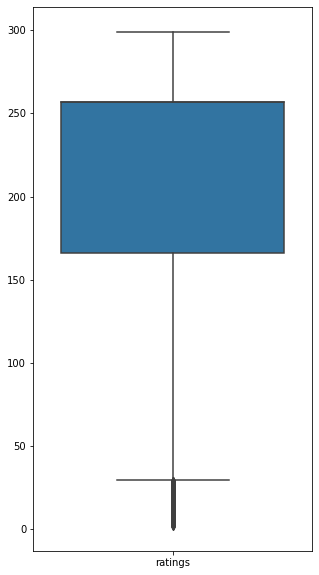

1817    257.0
1818    257.0
1820    257.0
1821    257.0
1822    257.0
        ...  
4993    257.0
4994    257.0
4995    257.0
4997    257.0
4998    257.0
Name: ratings, Length: 2630, dtype: float64


In [70]:
ratings=pd.DataFrame(data, columns=['ratings'])
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=ratings)
plt.show()

print(data['ratings'])

## EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3265 entries, 967 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  3265 non-null   object 
 1   ratings     3265 non-null   float64
 2   avg_score   3258 non-null   float64
 3   author      3265 non-null   object 
 4   score       3265 non-null   float64
 5   votes       3265 non-null   float64
dtypes: float64(4), object(2)
memory usage: 307.6+ KB


In [ ]:
data.head(-1)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,257.0,4.28,Jane Austen,237.0,10.0
1,"Fifty Shades of Grey (Fifty Shades, #1)",257.0,3.66,E.L. James,231.0,10.0
2,"Beautiful Disaster (Beautiful, #1)",257.0,4.04,Jamie McGuire,216.0,10.0
3,"Twilight (The Twilight Saga, #1)",257.0,3.64,Stephenie Meyer,138.0,10.0
4,"The Notebook (The Notebook, #1)",257.0,4.14,Nicholas Sparks,98.0,10.0
...,...,...,...,...,...,...
4893,The Endearment,257.0,4.04,LaVyrle Spencer,20.0,1.0
4894,Ein Hauch von Skandal,257.0,4.06,Sandra Brown,20.0,1.0
4895,Nothing Personal,257.0,3.63,Jaci Burton,19.0,1.0
4896,"Heiress in Love (Ministry of Marriage, #1)",898.0,3.71,Christina Brooke,19.0,1.0


In [71]:
print("number of author",data.author.nunique())

number of author 1639


In [72]:
print( data['author'].value_counts())

Eloisa James        22
Ella Fox            20
Nora Roberts        17
Suzanne Halliday    15
Dannika Dark        14
                    ..
Jennifer Gracen      1
Gloria Keverne       1
Melinda De Ross      1
نادية البنهاوي       1
Mina Carter          1
Name: author, Length: 1639, dtype: int64


In [ ]:
data.columns

Index(['book title', 'ratings', 'avg_score', 'author', 'score', 'votes'], dtype='object')

In [ ]:
dfvalued=data.groupby(['book title','author'],as_index=False).votes.max()
print("Top 10 books by  votes  ")
dfvalued.sort_values(by="votes",ascending=False).head(10)

Highest review  


,book title,author,votes
2603,"Outlander (Outlander, #1)",Diana Gabaldon,932.0
1846,Jane Eyre,Charlotte Brontë,897.0
4235,"Thoughtless (Thoughtless, #1)",S.C. Stephens,851.0
402,"Bared to You (Crossfire, #1)",Sylvia Day,836.0
1115,"Easy (Contours of the Heart, #1)",Tammara Webber,730.0
1505,Gone with the Wind,Margaret Mitchell,720.0
1449,"Gabriel's Inferno (Gabriel's Inferno, #1)",Sylvain Reynard,680.0
3163,"Slammed (Slammed, #1)",Colleen Hoover,616.0
4094,The Time Traveler's Wife,Audrey Niffenegger,609.0
320,Anna and the French Kiss (Anna and the French ...,Stephanie Perkins,592.0


In [ ]:
dfvalued=data.groupby(['book title','author'],as_index=False).ratings.max()
print("Top 10 books by  votes  ")
dfvalued.sort_values(by="ratings",ascending=False).head(10)

Top 10 books by  votes  


,book title,author,ratings
4488,Wake,Abria Mattina,999.0
4659,With the Father (With the Father #1),Jenni Moen,999.0
1659,"Hometown Girl After All (Hometown, #2)",Kirsten Fullmer,997.0
3777,"The Last Arrow (Robin Hood, #3)",Marsha Canham,995.0
1279,Fifteen Minutes of Shame,Lisa Daily,994.0
883,Crossfire (High Risk #2),JoAnn Ross,992.0
4672,"Wrapped in Silk (Wrapped, #1)",M.J. Fields,991.0
113,"A Reason To Stay (Blackwood Series, #1)",Melissa Ellen,988.0
2219,"Marrying Stone (Tales from Marrying Stone, #1)",Pamela Morsi,987.0
538,Blocked,Jennifer Lane,985.0
